In [120]:
"""
导入数据
"""
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir('C:\\Users\\Administrator\\Desktop\\')

data = pd.read_excel('5月拍照持2G终端用户.xlsx')

In [121]:
import warnings 
warnings.filterwarnings('ignore') 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve,confusion_matrix,precision_score,recall_score,roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import jieba
from wordcloud import WordCloud,ImageColorGenerator
from scipy.misc import imread
sns.set_style("darkgrid",{"font.sans-serif":['KaiTi', 'Arial']})
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']#指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [ ]:
一、数据初探-数据字段查看

In [122]:
data_ck=data.copy()

In [123]:
data_ck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85305 entries, 0 to 85304
Data columns (total 12 columns):
号码           85305 non-null int64
入网时间         85305 non-null int64
出账-元         85305 non-null float64
星级           85305 non-null object
资费名称         85305 non-null object
用户姓名         85305 non-null object
证件号码         85305 non-null object
年龄           85305 non-null object
证件地址         85249 non-null object
基站归属         85305 non-null object
是否3/4G同覆盖    85305 non-null object
是否成功2升4      85305 non-null int64
dtypes: float64(1), int64(3), object(8)
memory usage: 7.8+ MB


In [124]:
data_ck.describe().astype('str').T

,count,mean,std,min,25%,50%,75%,max
号码,85305.0,14445972734.0,1907943052.37,13003070003.0,13085046483.0,13195386763.0,15655443393.0,18697639886.0
入网时间,85305.0,20134168.8071,40064.814198,19980831.0,20110910.0,20141213.0,20161213.0,20180531.0
出账-元,85305.0,23.125470371,20.4086323184,0.01,12.0,19.45,26.2,524.83
是否成功2升4,85305.0,0.114729500029,0.318697085797,0.0,0.0,0.0,0.0,1.0


In [125]:
data_ck[(data_ck['出账-元']==0.01)|(data_ck['出账-元']>=500)]

,号码,入网时间,出账-元,星级,资费名称,用户姓名,证件号码,年龄,证件地址,基站归属,是否3/4G同覆盖,是否成功2升4
22300,15605546642,20130407,0.01,非高价值,原如意通－长话卡(OCS),秦成和,340405195301080230,65,安徽省淮南市八公山区新庄孜团结村肥皂厂十一号楼一单元４号,未知,否,0
25219,13275541957,20141121,0.01,非高价值,原如意通－长话卡(OCS),胡传英,340406194606052224,72,安徽省淮南市潘集区潘集集南村一００栋４３３户,未知,否,0
29636,13225548283,20131119,0.01,非高价值,原如意通－长话卡(OCS),周菊,340406197107102024,47,安徽省淮南市潘集区贺疃乡杨祠村杨祠５７－１户,未知,否,0
38544,15551280180,20160929,0.01,非高价值,如意通－凤台吉祥卡(OCS),李树琴,340421196110091820,57,安徽省凤台县凤凰镇盛楼村何圩队,未知,否,0
44638,13095543700,20170412,0.01,非高价值,日租卡,贾时珍,340421198204155281,36,安徽省凤台县大兴集乡大兴邮电所２２５８,凤台,是,0
50695,13013057625,20171010,0.01,非高价值,语音王升级版,张华,342325197203221109,46,安徽省淮南市田家庵区安成镇镇直散户,未知,否,0
61889,13145549791,20170109,0.01,非高价值,日租卡,马庆含,342422195410087798,64,安徽省寿县李山乡杨圩村柿元队００５号,寿县,是,0
61945,13145549117,20170621,0.01,非高价值,日租卡,王永胜,342422195410252570,64,安徽省寿县安丰塘镇长沟村朱郢村民组,寿县,是,0
65054,13033076946,20170520,0.01,非高价值,日租卡,耿桂兰,342422196003091081,58,安徽省寿县丰庄镇康圩村蒋圩村民组,未知,否,0
71608,15556046659,20151125,0.01,非高价值,一毛卡-预付费,张克娟,342422197009181103,48,安徽省寿县丰庄镇前圩村周圩村民组,未知,否,0


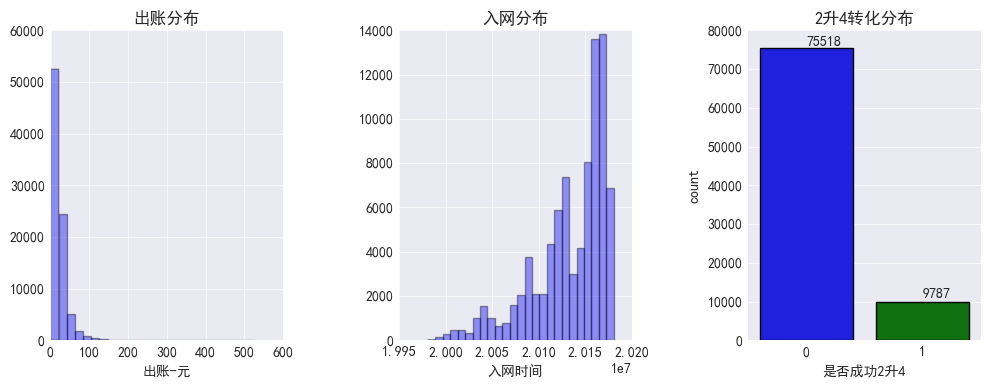

In [126]:
fig,[ax1,ax2,ax3]=plt.subplots(1,3,figsize=(12,4))
plt.subplots_adjust(wspace =0.5, hspace =0)
sns.distplot(data_ck[(data_ck['出账-元']!=0.01)|(data_ck['出账-元']<=500)]['出账-元'],bins=25,hist = True,kde = False,ax=ax1)
sns.distplot(data_ck['入网时间'],bins=25,hist = True,kde = False,ax=ax2)
sns.countplot("是否成功2升4", data=data_ck,ax=ax3)
#data_ck[(data_ck['出账-元']!=0.01)|(data_ck['出账-元']<=500)]['出账-元'].hist(bins=25,ax=ax1)
#data_ck['入网时间'].hist(bins=20,ax=ax2)
m=data_ck[data_ck['是否成功2升4']==1].shape[0]
n=data_ck[data_ck['是否成功2升4']==0].shape[0]
ax1.set_title('出账分布')
ax2.set_title('入网分布')
ax3.set_title('2升4转化分布')
plt.text(0.0006,76000,n)
plt.text(1,11000,m)
plt.show()



In [ ]:
二）定性字段分析

In [127]:
cat_list=['星级','资费名称','用户姓名','证件号码','证件地址','基站归属','是否3/4G同覆盖','年龄']
for n,i in enumerate(cat_list):
    Cabin_cat_num=data_ck[i].value_counts().shape[0]
    print('{0}.{1}特征的类型数量是：{2}'.format(n+1,i,Cabin_cat_num))

1.星级特征的类型数量是：4
2.资费名称特征的类型数量是：311
3.用户姓名特征的类型数量是：66764
4.证件号码特征的类型数量是：78167
5.证件地址特征的类型数量是：61734
6.基站归属特征的类型数量是：7
7.是否3/4G同覆盖特征的类型数量是：2
8.年龄特征的类型数量是：103


观察定性字段：
1.证件号码比总号码85304少，存在一户多号的情况，哪些用户使用多张联通号码？证件号码与证件地址相差1.5+数据量,是什么原因呢?是不是存一家人都是使用联通手机号并且长时间驻留在2G网络上？
2.2G用户的年龄种类有103种，其中包含‘未知’,主要的年龄段是什么？

In [128]:
#正常来说，一张身份证最多在同一家运营商办理5张电话卡，因此以5张作为分界线查看用户,又基于双卡双待手机，细分为小于5大于2的用户、
#等于2和一张电话卡的用户群。
data_zj=data_ck['证件号码'].value_counts().reset_index()
data_zjover5=data_zj[data_zj['证件号码']>5]
data_zjover5=pd.merge(data_zjover5.iloc[2:],data_ck,left_on='index',right_on='证件号码',how='left')
data_zjover5.drop_duplicates(subset=['index','是否成功2升4'],keep='first',inplace=True)
print(data_zjover5[['index','证件号码_x','年龄','星级','用户姓名','是否成功2升4']])

                  index  证件号码_x  年龄    星级                 用户姓名  是否成功2升4
0       340400000117592      59  未知  非高价值        淮南市交通投资有限责任公司        0
59            485319027      32  未知  非高价值               淮南市气象局        0
91   91340421MA2MR43C6E      23  未知  非高价值   国网安徽省电力有限公司凤台县供电公司        0
114     340400000116527      16  未知  非高价值      淮南市洋绎海金电子科技有限公司        0
130              999999      13  未知  非高价值                   匿名        0
143  91340400766871707D      12  未知    三星     淮南东华实业(集团)有限责任公司        0
155  91340400713904560P       9  未知    三星  中国移动通信集团安徽有限公司淮南分公司        0
164  91340400MA2MQPPY8W       8  未知  非高价值       安徽澳博瑞特投资管理有限公司        0
172  340406199209053859       7  26  非高价值                  张国庆        0
179  342422197001126097       7  48  非高价值                  高友山        0
186           394256905       6  未知    三星                淮南子学校        0


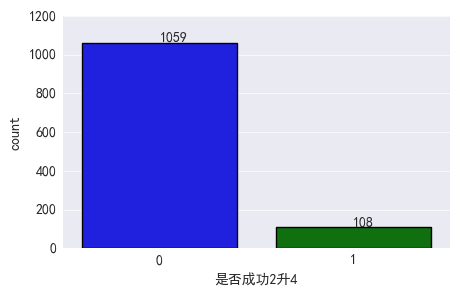

In [129]:
#大于2张电话卡小于5张电话卡
data_zjlower5over2=data_zj[(data_zj['证件号码']<=5)&(data_zj['证件号码']>2)]
data_zjlower5over2=pd.merge(data_zjlower5over2,data_ck,left_on='index',right_on='证件号码',how='left')
a=data_zjlower5over2[data_zjlower5over2['是否成功2升4']==0].shape[0]
b=data_zjlower5over2[data_zjlower5over2['是否成功2升4']==1].shape[0]
plt.figure(figsize=(5,3))
sns.countplot("是否成功2升4", data=data_zjlower5over2)
plt.text(0.002,1070,a)
plt.text(1,115,b)
plt.show()
#data_zjlower5over2.drop_duplicates(subset=['index'],keep='first',inplace=True)

In [10]:
#data_zjlower5over2.drop_duplicates(subset=['index'],keep='first',inplace=True)
#len(data_zjlower5over2)

364

In [130]:
#处理消费、年龄分箱
def cutcat(df,column,column1):
    df['arpucat']=''
    df['ageCat']=''
    df.loc[df[column]<=0.1,'arpucat'] = '一毛以下'
    df.loc[(df[column]>0.1)&(df[column]<=3),'arpucat'] = '3元以下'
    df.loc[(df[column]>3)&(df[column]<=5),'arpucat'] = '3-5元' 
    df.loc[(df[column]>5)&(df[column]<=19),'arpucat'] = '5-19元' 
    df.loc[(df[column]>19)&(df[column]<=29),'arpucat'] = '19-29元'
    df.loc[(df[column]>29)&(df[column]<=100),'arpucat'] = '百元以下' 
    df.loc[(df[column]>100),'arpucat'] = '百元以上'
    #入网时间分年制作
    df['timeCat']=df['入网时间'].astype('str').str[:4]
    #制作年龄分组
    for i in range(len(df)):
        if df[column1][i]=='未知':
            df['ageCat'][i]='未知'
            #print(df['ageCat'][i])
        else:
            a=int(df[column1][i])
            print(a)
            if a<=20:
                df['ageCat'][i]='20岁以下'
            elif a>20 and a<=40:
                df['ageCat'][i]='20-40岁'
            elif a>40 and a<=60:
                df['ageCat'][i]='40-60岁'
            elif a>60:
                df['ageCat'][i]='60岁以上'
    return df

In [131]:
cutcat(data_zjlower5over2,'出账-元','年龄')

64
64
64
64
64
47
47
47
47
47
38
38
38
38
38
65
65
65
65
65
76
76
76
76
76
54
54
54
54
54
47
47
47
47
47
24
24
24
24
24
21
21
21
21
21
24
24
24
24
24
42
42
42
42
42
41
41
41
41
48
48
48
48
39
39
39
39
77
77
77
77
34
34
34
34
47
47
47
47
37
37
37
37
61
61
61
61
30
30
30
30
39
39
39
39
37
37
37
37
29
29
29
29
38
38
38
38
45
45
45
45
84
84
84
84
39
39
39
39
60
60
60
60
35
35
35
35
25
25
25
25
39
39
39
39
38
38
38
38
32
32
32
32
39
39
39
39
27
27
27
27
76
76
76
76
48
48
48
48
62
62
62
62
85
85
85
85
66
66
66
66
34
34
34
34
32
32
32
32
83
83
83
83
28
28
28
28
38
38
38
38
50
50
50
50
33
33
33
33
80
80
80
80
57
57
57
57
32
32
32
32
65
65
65
65
20
20
20
20
51
51
51
51
51
51
51
51
24
24
24
24
48
48
48
48
47
47
47
47
45
45
45
45
44
44
44
42
42
42
33
33
33
46
46
46
56
56
56
60
60
60
76
76
76
75
75
75
66
66
66
61
61
61
53
53
53
51
51
51
67
67
67
35
35
35
46
46
46
70
70
70
40
40
40
63
63
63
68
68
68
57
57
57
41
41
41
50
50
50
24
24
24
39
39
39
41
41
41
45
45
45
63
63
63
59
59
59
53
53
53
50
50
50
4

,index,证件号码_x,号码,入网时间,出账-元,星级,资费名称,用户姓名,证件号码_y,年龄,证件地址,基站归属,是否3/4G同覆盖,是否成功2升4,arpucat,ageCat,timeCat
0,342422195410286754,5,13225549473,20180331,13.80,非高价值,日租卡,王兆巨,342422195410286754,64,安徽省寿县炎刘镇三关村陈庙队,寿县,是,0,5-19元,60岁以上,2018
1,342422195410286754,5,13225549476,20180331,13.80,非高价值,日租卡,王兆巨,342422195410286754,64,安徽省寿县炎刘镇三关村陈庙队,未知,否,0,5-19元,60岁以上,2018
2,342422195410286754,5,15675549398,20161129,8.60,非高价值,日租卡,王兆巨,342422195410286754,64,安徽省寿县炎刘镇三关村陈庙队,寿县,是,0,5-19元,60岁以上,2016
3,342422195410286754,5,15675549713,20180331,9.00,非高价值,日租卡,王兆巨,342422195410286754,64,安徽省寿县炎刘镇三关村陈庙队,未知,否,0,5-19元,60岁以上,2018
4,342422195410286754,5,15675549731,20180331,1.00,非高价值,日租卡,王兆巨,342422195410286754,64,安徽省寿县炎刘镇三关村陈庙队,未知,否,0,3元以下,60岁以上,2018
5,340404197110061216,5,13003078803,20180523,10.00,非高价值,日租卡,杨家全,340404197110061216,47,安徽省淮南市谢家集区李郢孜集体户３,西区,是,0,5-19元,40-60岁,2018
6,340404197110061216,5,13003079117,20180523,10.00,非高价值,日租卡,杨家全,340404197110061216,47,安徽省淮南市谢家集区李郢孜集体户３,西区,是,0,5-19元,40-60岁,2018
7,340404197110061216,5,13003079235,20180523,10.00,非高价值,日租卡,杨家全,340404197110061216,47,安徽省淮南市谢家集区李郢孜集体户３,西区,是,0,5-19元,40-60岁,2018
8,340404197110061216,5,13003079237,20180523,10.00,非高价值,日租卡,杨家全,340404197110061216,47,安徽省淮南市谢家集区李郢孜集体户３,西区,是,0,5-19元,40-60岁,2018
9,340404197110061216,5,13003079309,20180523,10.00,非高价值,日租卡,杨家全,340404197110061216,47,安徽省淮南市谢家集区李郢孜集体户３,西区,是,0,5-19元,40-60岁,2018


In [ ]:
#存储信息
writer=pd.ExcelWriter('C:\\Users\\Administrator\\Desktop\\3张4张电话卡用户信息.xlsx')
data_zjlower5over2.to_excel(writer,index=False)
writer.save()

In [110]:
'''
#有3、4、5张电话卡的用户属性制作

#资费分箱制作
data_zjlower5over2['arpuCat']=''
data_zjlower5over2.loc[data_zjlower5over2['出账-元']<=0.1,'arpuCat'] = '一毛以下'
data_zjlower5over2.loc[(data_zjlower5over2['出账-元']>0.1)&(data_zjlower5over2['出账-元']<=3),'arpuCat'] = '3元以下'
data_zjlower5over2.loc[(data_zjlower5over2['出账-元']>3)&(data_zjlower5over2['出账-元']<=5),'arpuCat'] = '3-5元' 
data_zjlower5over2.loc[(data_zjlower5over2['出账-元']>5)&(data_zjlower5over2['出账-元']<=19),'arpuCat'] = '5-19元' 
data_zjlower5over2.loc[(data_zjlower5over2['出账-元']>19)&(data_zjlower5over2['出账-元']<=29),'arpuCat'] = '19-29元'
data_zjlower5over2.loc[(data_zjlower5over2['出账-元']>29)&(data_zjlower5over2['出账-元']<=100),'arpuCat'] = '百元以下' 
data_zjlower5over2.loc[(data_zjlower5over2['出账-元']>100),'arpuCat'] = '百元以上' 

#入网时间分年制作
data_zjlower5over2['timeCat']=data_zjlower5over2['入网时间'].astype('str').str[:4]
'''

"\n#有3、4、5张电话卡的用户属性制作\n\n#资费分箱制作\ndata_zjlower5over2['arpuCat']=''\ndata_zjlower5over2.loc[data_zjlower5over2['出账-元']<=0.1,'arpuCat'] = '一毛以下'\ndata_zjlower5over2.loc[(data_zjlower5over2['出账-元']>0.1)&(data_zjlower5over2['出账-元']<=3),'arpuCat'] = '3元以下'\ndata_zjlower5over2.loc[(data_zjlower5over2['出账-元']>3)&(data_zjlower5over2['出账-元']<=5),'arpuCat'] = '3-5元' \ndata_zjlower5over2.loc[(data_zjlower5over2['出账-元']>5)&(data_zjlower5over2['出账-元']<=19),'arpuCat'] = '5-19元' \ndata_zjlower5over2.loc[(data_zjlower5over2['出账-元']>19)&(data_zjlower5over2['出账-元']<=29),'arpuCat'] = '19-29元'\ndata_zjlower5over2.loc[(data_zjlower5over2['出账-元']>29)&(data_zjlower5over2['出账-元']<=100),'arpuCat'] = '百元以下' \ndata_zjlower5over2.loc[(data_zjlower5over2['出账-元']>100),'arpuCat'] = '百元以上' \n\n#入网时间分年制作\ndata_zjlower5over2['timeCat']=data_zjlower5over2['入网时间'].astype('str').str[:4]\n"

In [109]:
'''
data_zjlower5over2['ageCat']=''
for i in range(len(data_zjlower5over2)):
    if data_zjlower5over2['年龄'][i]=='未知':
        data_zjlower5over2['ageCat'][i]='未知'
        print(data_zjlower5over2['ageCat'][i])
    else:
        a=int(data_zjlower5over2['年龄'][i])
        if a<=20:
            data_zjlower5over2['ageCat'][i]='20岁以下'
        elif a>20 and a<=40:
            data_zjlower5over2['ageCat'][i]='20-40岁'
        elif a>40 and a<=60:
            data_zjlower5over2['ageCat'][i]='40-60岁'
        elif a>60:
            data_zjlower5over2['ageCat'][i]='60岁以上'
'''


"\ndata_zjlower5over2['ageCat']=''\nfor i in range(len(data_zjlower5over2)):\n    if data_zjlower5over2['年龄'][i]=='未知':\n        data_zjlower5over2['ageCat'][i]='未知'\n        print(data_zjlower5over2['ageCat'][i])\n    else:\n        a=int(data_zjlower5over2['年龄'][i])\n        if a<=20:\n            data_zjlower5over2['ageCat'][i]='20岁以下'\n        elif a>20 and a<=40:\n            data_zjlower5over2['ageCat'][i]='20-40岁'\n        elif a>40 and a<=60:\n            data_zjlower5over2['ageCat'][i]='40-60岁'\n        elif a>60:\n            data_zjlower5over2['ageCat'][i]='60岁以上'\n"

In [13]:
def creat_word_cloud(filename):
    word=open('{}.txt'.format(filename)).read()
    wordlist=jieba.cut(word,cut_all=False)
    wl=''.join(wordlist)
    #rint(wl)
    
    bg_pic=imread('a.jpg')
    #设置词云
    wc=WordCloud(
    background_color='white',
    max_words=20,
    font_path='C:\\Windows\\Fonts\\FZSTK.TTF',
    # 设置有多少种随机生成状态，即有多少种配色方案
    random_state=30,
    mask= bg_pic,
    scale=1.5,height= 1200,
       width= 1600,min_font_size=4,
    max_font_size=100,relative_scaling=0.9,
    prefer_horizontal=0.9)
    
    image_colors=ImageColorGenerator(bg_pic)
    
    myword=wc.generate(wl)
 
    plt.imshow(myword,interpolation='bilinear')
    plt.axis('off')
    wc.to_file('3-4user information.png')
    

In [37]:
 creat_word_cloud('3张4张电话卡用户信息')

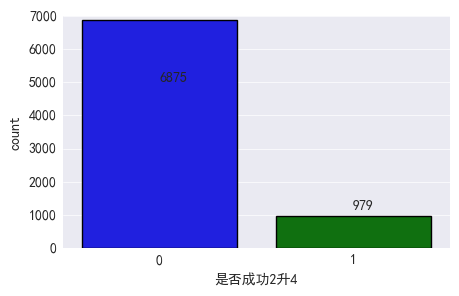

In [132]:

#拥有2张电话卡的用户
data_zjlequal2=data_zj[data_zj['证件号码']==2]
data_zjlequal2=pd.merge(data_zjlequal2,data_ck,left_on='index',right_on='证件号码',how='left')
a=data_zjlequal2[data_zjlequal2['是否成功2升4']==0].shape[0]
b=data_zjlequal2[data_zjlequal2['是否成功2升4']==1].shape[0]
plt.figure(figsize=(5,3))
sns.countplot("是否成功2升4", data=data_zjlequal2)
plt.text(0.002,5000,a)
plt.text(1,1150,b)
plt.show()
#data_zjlower5over2.drop_duplicates(subset=['index'],keep='first',inplace=True)


In [52]:
'''
#有2张电话卡的用户属性制作

#资费分箱制作
data_zjlequal2['arpuCat']=''
data_zjlequal2.loc[data_zjlequal2['出账-元']<=0.1,'arpuCat'] = '一毛以下'
data_zjlequal2.loc[(data_zjlequal2['出账-元']>0.1)&(data_zjlequal2['出账-元']<=3),'arpuCat'] = '3元以下'
data_zjlequal2.loc[(data_zjlequal2['出账-元']>3)&(data_zjlequal2['出账-元']<=5),'arpuCat'] = '3-5元' 
data_zjlequal2.loc[(data_zjlequal2['出账-元']>5)&(data_zjlequal2['出账-元']<=19),'arpuCat'] = '5-19元' 
data_zjlequal2.loc[(data_zjlequal2['出账-元']>19)&(data_zjlequal2['出账-元']<=29),'arpuCat'] = '19-29元'
data_zjlequal2.loc[(data_zjlequal2['出账-元']>29)&(data_zjlequal2['出账-元']<=100),'arpuCat'] = '百元以下' 
data_zjlequal2.loc[(data_zjlequal2['出账-元']>100),'arpuCat'] = '百元以上' 

#入网时间分年制作
data_zjlequal2['timeCat']=data_zjlequal2['入网时间'].astype('str').str[:4]
'''

In [114]:

'''
data_zjlequal2['ageCat']=''
for i in range(len(data_zjlequal2)):
    if data_zjlequal2['年龄'][i]=='未知':
        data_zjlequal2['ageCat'][i]='未知'
        print(data_zjlequal2['ageCat'][i])
    else:
        a=int(data_zjlequal2['年龄'][i])
        if a<=20:
            data_zjlequal2['ageCat'][i]='20岁以下'
        elif a>20 and a<=40:
            data_zjlequal2['ageCat'][i]='20-40岁'
        elif a>40 and a<=60:
            data_zjlequal2['ageCat'][i]='40-60岁'
        elif a>60:
            data_zjlequal2['ageCat'][i]='60岁以上'
'''

"\ndata_zjlequal2['ageCat']=''\nfor i in range(len(data_zjlequal2)):\n    if data_zjlequal2['年龄'][i]=='未知':\n        data_zjlequal2['ageCat'][i]='未知'\n        print(data_zjlequal2['ageCat'][i])\n    else:\n        a=int(data_zjlequal2['年龄'][i])\n        if a<=20:\n            data_zjlequal2['ageCat'][i]='20岁以下'\n        elif a>20 and a<=40:\n            data_zjlequal2['ageCat'][i]='20-40岁'\n        elif a>40 and a<=60:\n            data_zjlequal2['ageCat'][i]='40-60岁'\n        elif a>60:\n            data_zjlequal2['ageCat'][i]='60岁以上'\n"

In [57]:
#存储信息
writer=pd.ExcelWriter('C:\\Users\\Administrator\\Desktop\\2张电话卡用户信息.xlsx')
data_zjlequal2.to_excel(writer,index=False)
writer.save()

In [58]:
 creat_word_cloud('2张电话卡用户信息')

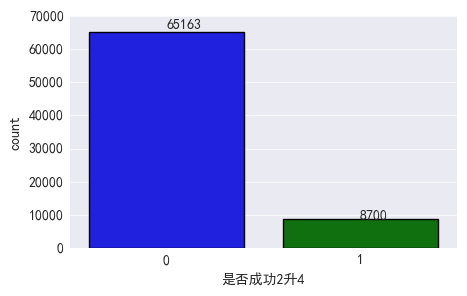

In [133]:
#拥有1张电话卡的用户
data_zjlequal1=data_zj[data_zj['证件号码']==1]
data_zjlequal1=pd.merge(data_zjlequal1,data_ck,left_on='index',right_on='证件号码',how='left')
a=data_zjlequal1[data_zjlequal1['是否成功2升4']==0].shape[0]
b=data_zjlequal1[data_zjlequal1['是否成功2升4']==1].shape[0]
plt.figure(figsize=(5,3))
sns.countplot("是否成功2升4", data=data_zjlequal1)
plt.text(0.002,66000,a)
plt.text(1,8850,b)
plt.show()
#data_zjlequal1.drop_duplicates(subset=['index'],keep='first',inplace=True)

In [23]:
#存储信息
writer=pd.ExcelWriter('C:\\Users\\Administrator\\Desktop\\1张电话卡用户信息.xlsx')
data_zjlequal1.to_excel(writer,index=False)
writer.save()

In [42]:
creat_word_cloud('1张电话卡用户信息')

In [134]:
data_zj=data_ck['证件号码'].value_counts().reset_index()
data_zjover5=data_zj[data_zj['证件号码']>5]
data_zjover5=pd.merge(data_zjover5.iloc[2:],data_ck,left_on='index',right_on='证件号码',how='left')
data_zjover5['电话卡数量']='5张以上'
data_zjlower5over2=data_zj[(data_zj['证件号码']<=5)&(data_zj['证件号码']>2)]
data_zjlower5over2=pd.merge(data_zjlower5over2,data_ck,left_on='index',right_on='证件号码',how='left')
data_zjlower5over2['电话卡数量']='3/4/5张'
data_zjlequal2=data_zj[data_zj['证件号码']==2]
data_zjlequal2=pd.merge(data_zjlequal2,data_ck,left_on='index',right_on='证件号码',how='left')
data_zjlequal2['电话卡数量']='2张'
data_zjlequal1=data_zj[data_zj['证件号码']==1]
data_zjlequal1=pd.merge(data_zjlequal1,data_ck,left_on='index',right_on='证件号码',how='left')
data_zjlequal1['电话卡数量']='1张'

In [135]:
data_zg=pd.concat([data_zjover5,data_zjlower5over2,data_zjlequal2,data_zjlequal1])

In [136]:
gbRatioList = {}
for m in data_zg['电话卡数量'].value_counts().index:
    data = data_zg.loc[data_zg['电话卡数量']==m]
    gbRatio = data.loc[data['是否成功2升4']==1].shape[0]/len(data)
    gbRatioList[m] = gbRatio

In [137]:
gbRatioList

{'1张': 0.11778563015312132,
 '2张': 0.12464985994397759,
 '3/4/5张': 0.09254498714652956,
 '5张以上': 0.0}

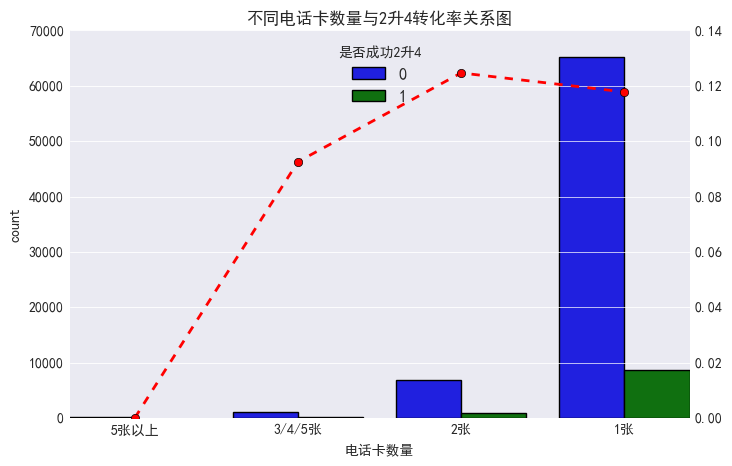

In [138]:
f,ax = plt.subplots(figsize=(8,5))
sns.countplot('电话卡数量', hue='是否成功2升4', data=data_zg, ax=ax)
ax2 = ax.twinx()
#ax2.plot([round(x,2) for x in gbRatioList.values()],'ro--',linewidth=2)
ax2.plot([0,0.09254498714652956,0.12464985994397759,0.11778563015312132],'ro--',linewidth=2)
plt.title('不同电话卡数量与2升4转化率关系图')
plt.savefig('0.png')
plt.show()

In [139]:
k=data_ck[data_ck['年龄']=='未知']
n=data_ck[data_ck['年龄']!='未知']
n.sort_values(by='年龄',ascending=True,inplace=True)
data_age=pd.concat([n,k])

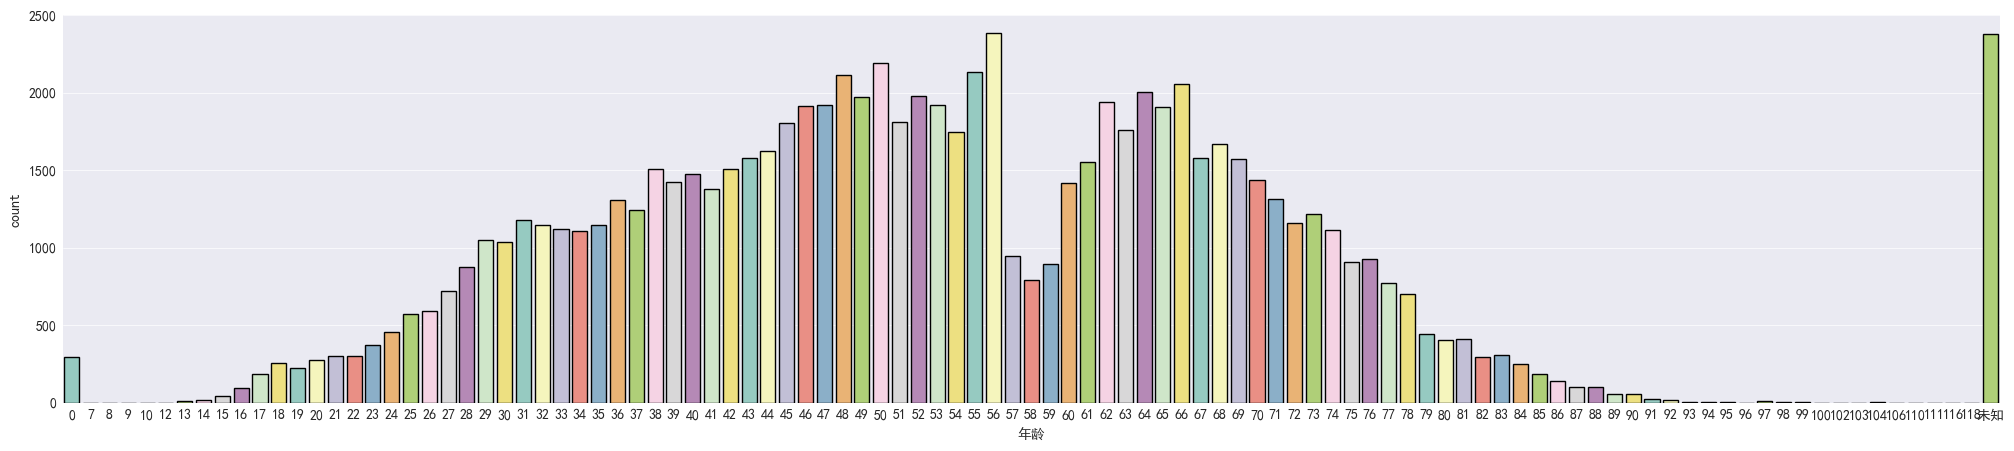

In [140]:
f,ax = plt.subplots(figsize=(25,5))
sns.countplot("年龄", data=data_age,palette="Set3",ax=ax)
plt.show()

In [141]:
temp=data_zg[data_zg['年龄']!='未知']
temp=temp.reset_index()
le = preprocessing.LabelEncoder()
data_connet=temp[[
 '入网时间',
 '出账-元',
 '星级',
 '资费名称',
 '年龄',
 '基站归属',
 '是否3/4G同覆盖',
 '是否成功2升4','电话卡数量']]

In [142]:
print(len(data_connet))

82629


In [143]:
data_connet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82629 entries, 0 to 82628
Data columns (total 9 columns):
入网时间         82629 non-null int64
出账-元         82629 non-null float64
星级           82629 non-null object
资费名称         82629 non-null object
年龄           82629 non-null object
基站归属         82629 non-null object
是否3/4G同覆盖    82629 non-null object
是否成功2升4      82629 non-null int64
电话卡数量        82629 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 5.7+ MB


In [144]:
data_connet.head()

,入网时间,出账-元,星级,资费名称,年龄,基站归属,是否3/4G同覆盖,是否成功2升4,电话卡数量
0,20151108,6.0,非高价值,原如意通－长话卡(OCS),26,未知,否,0,5张以上
1,20150830,6.0,非高价值,原如意通－长话卡(OCS),26,未知,否,0,5张以上
2,20150830,6.0,非高价值,原如意通－长话卡(OCS),26,未知,否,0,5张以上
3,20151026,6.0,非高价值,原如意通－长话卡(OCS),26,未知,否,0,5张以上
4,20151026,6.0,非高价值,原如意通－长话卡(OCS),26,未知,否,0,5张以上


In [145]:
data_connet['星级']=le.fit_transform(data_connet['星级'])
data_connet['资费名称']=le.fit_transform(data_connet['资费名称'])
data_connet['基站归属']=le.fit_transform(data_connet['基站归属'])
data_connet['是否3/4G同覆盖']=le.fit_transform(data_connet['是否3/4G同覆盖'])  
data_connet['电话卡数量']=le.fit_transform(data_connet['电话卡数量'])  

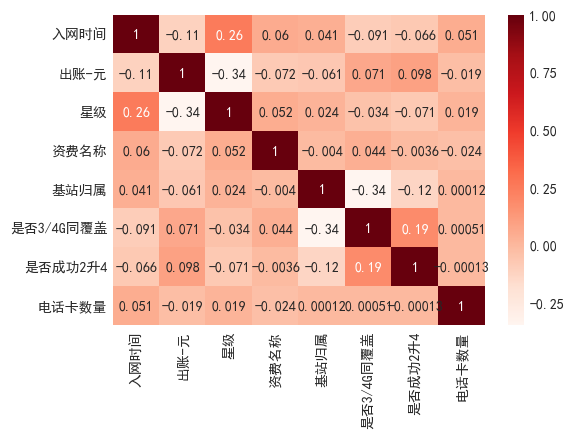

In [146]:
corr = data_connet.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True,cmap = 'Reds', fmt=".2g")
plt.show()

In [147]:
corr['是否成功2升4'].sort_values(ascending=False)

是否成功2升4      1.000000
是否3/4G同覆盖    0.189325
出账-元         0.098244
电话卡数量       -0.000132
资费名称        -0.003637
入网时间        -0.066324
星级          -0.070556
基站归属        -0.124956
Name: 是否成功2升4, dtype: float64

In [148]:
#分组抽样数据
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in sss.split(data_connet,data_connet['是否成功2升4']):
    strat_train_set=data_connet.loc[train_index]
    strat_test_set=data_connet.loc[test_index]

In [149]:
strat_train_set=strat_train_set.reset_index().drop('index',axis=1)
strat_test_set=strat_test_set.reset_index().drop('index',axis=1)

In [150]:
#准备数据特征和目标
x_train=strat_train_set[['入网时间', '出账-元', '星级', '资费名称', '年龄', '基站归属', '是否3/4G同覆盖','电话卡数量']]
x_test=strat_test_set[['入网时间', '出账-元', '星级', '资费名称', '年龄', '基站归属', '是否3/4G同覆盖','电话卡数量']]
y_test=strat_test_set['是否成功2升4']
y_train=strat_train_set['是否成功2升4']

In [151]:
#数据标准化
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
'''
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid={
    'gamma':[0.1,0.3,0.5,1],
    'kernel':['rbf','poly']
            }
svm_clf=SVC()
grid_search=GridSearchCV(svm_clf,param_grid,cv=3)
grid_search.fit(x_train,y_train)
'''

In [152]:
#pr
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="upper right", fontsize=10) # Not shown in the book
    plt.xlabel("Threshold", fontsize=12)        # Not shown
    plt.grid(True)                              # Not shown  
    plt.show()

In [31]:
#支持向量机训练
svm_clf=SVC(gamma=0.1,kernel='rbf')
svm_clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

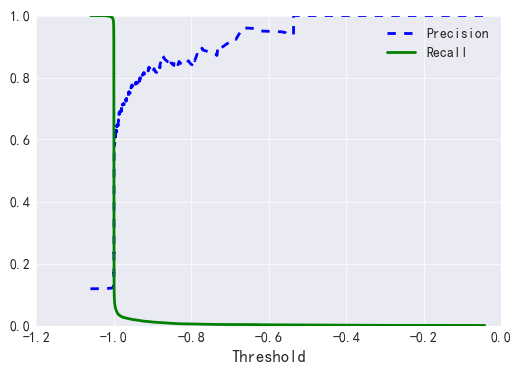

In [153]:
svm_y_score=svm_clf.decision_function(x_train)
svm_precisions, svm_recalls, svm_thresholds =precision_recall_curve(y_train,svm_y_score)
plot_precision_recall_vs_threshold(svm_precisions, svm_recalls,svm_thresholds)

In [66]:
#随机森林
forest_clf = RandomForestClassifier(n_estimators=100,n_jobs=-1, class_weight='balanced',max_depth=5
                                    ,random_state=42)
forest_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

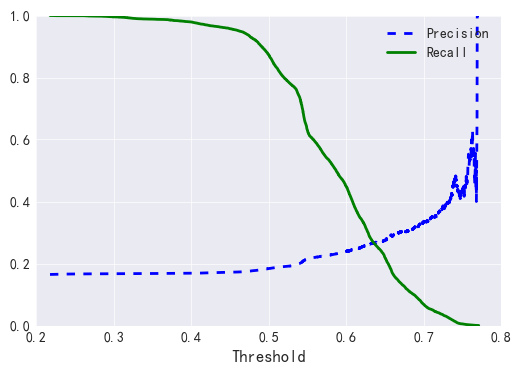

In [154]:
fore_scores_proba =forest_clf.predict_proba(x_train)
fore_y_scores = fore_scores_proba[:,1]
fore_precisions, fore_recalls, fore_thresholds =precision_recall_curve(y_train,fore_y_scores)
plot_precision_recall_vs_threshold(fore_precisions, fore_recalls,fore_thresholds)

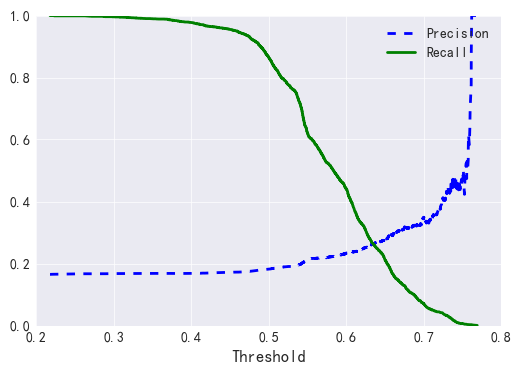

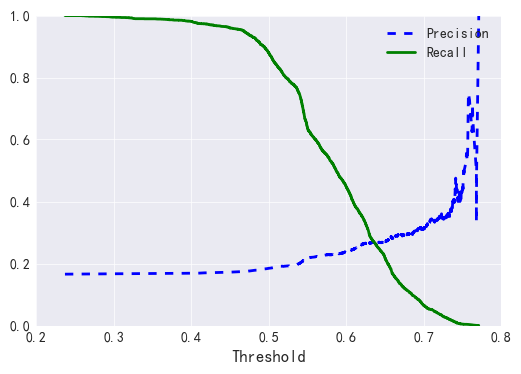

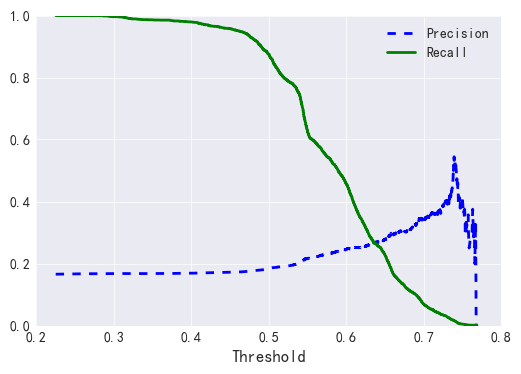

In [155]:
#分层交叉验证查看模型的泛化能力
skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(x_train, y_train):
    clone_clf = clone(forest_clf)
    x_train_folds = x_train[train_index]
    y_train_folds = y_train[train_index]
    x_test_fold = x_train[test_index]
    y_test_fold = y_train[test_index]
    
    
    clone_clf.fit(x_train_folds, y_train_folds)
    fore_scores_proba =forest_clf.predict_proba(x_test_fold)
    fore_y_scores= fore_scores_proba[:,1]
    fore_precisions, fore_recalls, fore_thresholds =precision_recall_curve(y_test_fold,fore_y_scores)
    plot_precision_recall_vs_threshold(fore_precisions, fore_recalls,fore_thresholds)
    
    

In [ ]:
#模型的泛化能力是预期效果到达预期，可以利用该模型预测数据了

In [156]:
fore_scores_proba =forest_clf.predict_proba(x_test)
fore_y_scores= fore_scores_proba[:,1]

In [157]:
y_pred=(fore_y_scores >0.5)  

In [158]:
print('预测的精度为{}。'.format(precision_score(y_test,y_pred)))
print('预测的召回率为{}。'.format(recall_score(y_test,y_pred)))

预测的精度为0.18464。
预测的召回率为0.884517118037813。


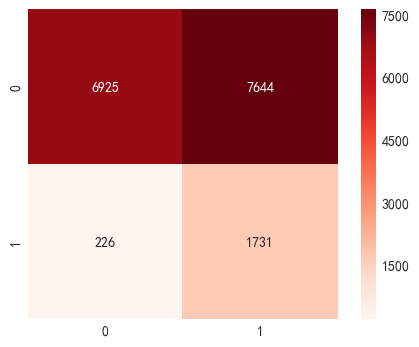

In [159]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(confusion_matrix)
sns.heatmap(df_cm,annot = True,fmt = 'd',cmap = 'Reds',square = True )
plt.show()

In [ ]:
分析和模型建立处理完毕，以下是查看logistic的表现

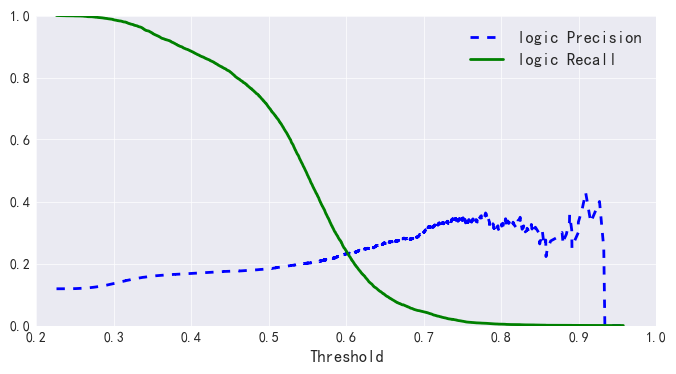

In [206]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.xlabel("Threshold", fontsize=12)        # Not shown
    plt.grid(True)                              # Not shown
        
plt.figure(figsize=(8, 4))                      # Not shown
plot_precision_recall_vs_threshold(logic_precisions, logic_recalls, logic_thresholds)
plt.plot(logic_thresholds, logic_precisions[:-1], "b--", label="logic Precision", linewidth=2)
plt.plot(logic_thresholds, recalls[:-1], "g-", label="logic Recall", linewidth=2)


plt.legend(loc="upper right", fontsize=12)
plt.show()


In [279]:
logic_scores_predic_proba =logic.predict_proba(x_test)
logic_scores = logic_scores_predic_proba[:,1]
logic_test_pred=(logic_scores >0.5)

In [280]:
from sklearn.metrics import precision_score,recall_score
print(precision_score(y_test,logic_test_pred))
print(recall_score(y_test,logic_test_pred))

0.180868167203
0.689831374553
